In [6]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.callbacks import CallbackList, CheckpointCallback, EvalCallback

import os.path
import numpy as np
import pandas as pd
from tensorboardX import SummaryWriter

from lib_for_dqn import lifecycle

N_STEPS = 10_000_000

env = lifecycle.LifecycleEnv()
check_env(env)
model = PPO("MlpPolicy", env, learning_rate=0.000001, tensorboard_log="./runs/")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
c:\Users\astragio\rep\Anaconda3\lib\site-packages\stable_baselines3\common\env_checker.py:272: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


In [7]:
class TensorboardCallback(BaseCallback):

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        value = np.random.random()
        self.logger.record('random_value', value)
        return True

In [8]:
# if os.path.isfile("C:\\Users\\AS\\rep\\ucl_final_project\\reinforcement\\life.zip"):
#     model = PPO.load("life", env=env)

eval_env = lifecycle.LifecycleEnv()
eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/best_model', log_path='./logs/results', eval_freq=(N_STEPS/10))

model.learn(total_timesteps=N_STEPS, callback=eval_callback)
# model.save("life")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=100000, episode_reward=5048.21 +/- 0.00
Episode length: 97.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200000, episode_reward=5434.18 +/- 0.00
Episode length: 97.00 +/- 0.00
New best mean reward!
Eval num_timesteps=300000, episode_reward=5323.76 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=400000, episode_reward=5167.09 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=500000, episode_reward=5068.43 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=600000, episode_reward=4966.20 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=700000, episode_reward=4945.26 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=800000, episode_reward=4904.75 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=900000, episode_reward=4886.08 +/- 0.00
Episode length: 97.00 +/- 0.00
Eval num_timesteps=1000000, episode_reward=4864.94 +/- 0.00
Episode length: 97.00 +/- 0.00


In [9]:
# watch trained agent
state = env.reset()
done = False
rewards = 0
num_steps = env.terminal_age - env.starting_age + 1
info_df = pd.DataFrame(
    columns=("age", "start_wealth", "wealth", "consumption", "equity_allocation", "port_return"))

for step in range(num_steps):
    action, _states = model.predict(state, deterministic=True)
    new_state, reward, done, info = env.step(action)
    info_df.loc[len(info_df.index)] = info
    rewards += reward
    state = new_state
print(rewards)

4863.282668673918


Text(0.5, 1.0, 'Equity Allocation')

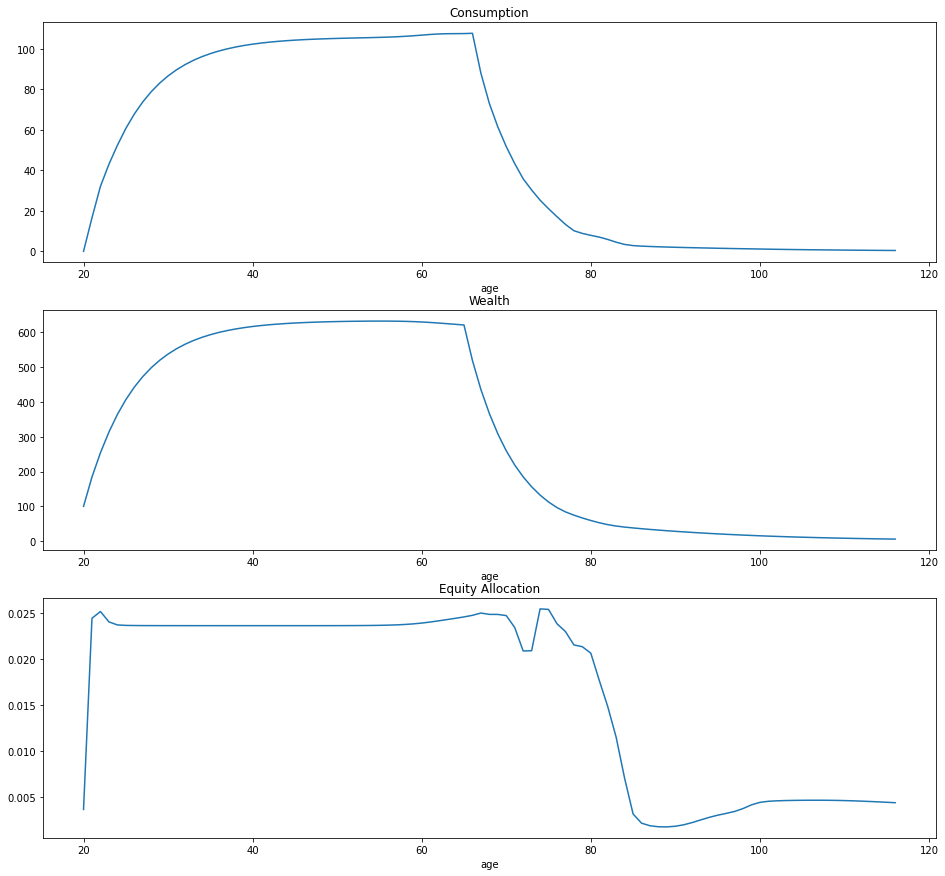

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 3, figsize=(16, 15))
info_df.set_index("age").consumption.rename("consumption").plot(ax = ax[0])
ax[0].set_title("Consumption")
info_df.set_index("age").wealth.plot(ax = ax[1])
ax[1].set_title("Wealth")
info_df.set_index("age").equity_allocation.plot(ax = ax[2])
ax[2].set_title("Equity Allocation")